In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [0]:
def get_text():
  path = tf.keras.utils.get_file('nietzsche.txt',
                               origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt') 
  text = open(path).read().lower()
  return text

In [4]:
text_data = get_text()
print("Character length: {0}".format(len(text_data)))

Character length: 600893


In [5]:
print(text_data[:100])

preface


supposing that truth is a woman--what then? is there not ground
for suspecting that all ph


In [0]:
def preprocess_split(text, max_len, step):
  sentences, next_char = [], []
  for i in range(0, len(text) - max_len, step):
    sentences.append(text[i: i + max_len])
    next_char.append(text[i + max_len])
  char_lst = sorted(list(set(text)))
  char_dict = {char: char_lst.index(char) for char in char_lst}
  X = np.zeros((len(sentences), max_len, len(char_lst)), dtype=np.bool)
  y = np.zeros((len(next_char), len(char_lst)), dtype=np.bool)
  for i, sentence in enumerate(sentences):
    for j, char in enumerate(sentence):
      X[i, j, char_dict[char]] = 1
    y[i, char_dict[next_char[i]]] = 1
  return X, y, char_dict

In [7]:
max_len = 60
X, y, char_dict = preprocess_split(text_data, max_len, 3)
vocab_size = len(char_dict)
print("Number of sequences: {0}\nNumber of unique characters: {1}".format(len(X), vocab_size))

Number of sequences: 200278
Number of unique characters: 57


In [0]:
def build_model(max_len, vocab_size):
  inputs = layers.Input(shape=(max_len, vocab_size))
  x = layers.LSTM(128)(inputs)
  output = layers.Dense(vocab_size, activation=tf.nn.softmax)(x)
  model = Model(inputs, output)
  model.compile(optimizer='adam', loss='categorical_crossentropy')
  return model

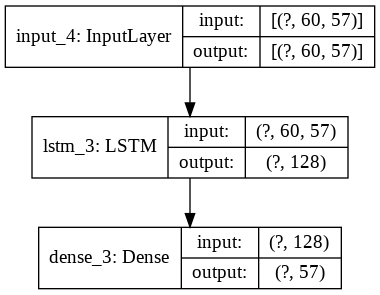

In [14]:
model = build_model(max_len, vocab_size)
plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
history = model.fit(X, y, epochs=50, batch_size=128)

Train on 200278 samples
Epoch 1/50
200278/200278 [==============================] - 164s 817us/sample - loss: 2.5568
Epoch 2/50
200278/200278 [==============================] - 163s 813us/sample - loss: 2.1656
Epoch 3/50
200278/200278 [==============================] - 162s 810us/sample - loss: 2.0227
Epoch 4/50
200278/200278 [==============================] - 162s 809us/sample - loss: 1.9278
Epoch 5/50
200278/200278 [==============================] - 161s 805us/sample - loss: 1.8586
Epoch 6/50
200278/200278 [==============================] - 162s 811us/sample - loss: 1.8032
Epoch 7/50
200278/200278 [==============================] - 163s 815us/sample - loss: 1.7582
Epoch 8/50
200278/200278 [==============================] - 165s 825us/sample - loss: 1.7197
Epoch 9/50
200278/200278 [==============================] - 167s 833us/sample - loss: 1.6866
Epoch 10/50
200278/200278 [==============================] - 166s 830us/sample - loss: 1.6577
Epoch 11/50
200278/200278 [==================

In [0]:
from google.colab import files

model = model.save('model.hdf5')
files.download('model.hdf5')

In [0]:
model = load_model('model.hdf5')

In [0]:
def plot_learning_curve(history):
  loss = history.history['loss']
  epochs = [i for i, _ in enumerate(loss)]
  plt.scatter(epochs, loss, color='skyblue')
  plt.xlabel('Epochs'); plt.ylabel('Cross Entropy Loss')
  plt.show()

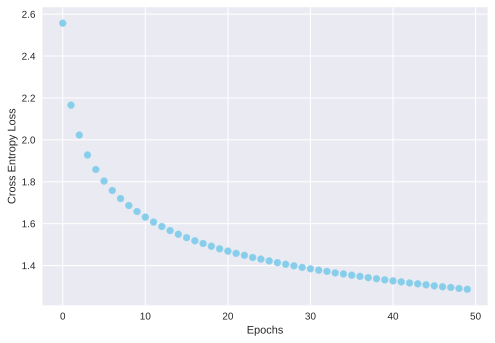

In [29]:
plot_learning_curve(history)

In [0]:
def random_predict(prediction, temperature):
  prediction = np.asarray(prediction).astype('float64')
  log_pred = np.log(prediction) / temperature
  exp_pred = np.exp(log_pred)
  final_pred = exp_pred / np.sum(exp_pred)
  random_pred = np.random.multinomial(1, final_pred)
  return random_pred

In [0]:
def generate_text(model, data, iter_num, seed, char_dict, temperature=1, max_len=60):
  entire_text = list(data[seed])
  for i in range(iter_num):
    prediction = random_predict(model.predict([[entire_text[i: i + max_len]]])[0], temperature)
    entire_text.append(prediction)
  reverse_char_dict = {value: key for key, value in char_dict.items()}
  generated_text = ''
  for char_vec in entire_text:
    index = np.argmax(char_vec)
    generated_text += reverse_char_dict[index]
  return generated_text

In [0]:
def vary_temperature(temp_lst, model, data, iter_num, seed, char_dict):
  for temperature in temp_lst:
    print("Generated text at temperature {0}:\n{1}\n\n".format(temperature, generate_text(model, data, iter_num, seed, char_dict, temperature)))

In [44]:
vary_temperature([0.3, 0.6, 0.9, 1.2], model, X, 1000, 10, char_dict)

Generated text at temperature 0.3:
 is a woman--what then? is there not ground
for suspecting that the experience and present strange of the soul is also as the stand of the most profound that the present the art and possible to the present spore as a man and the morality and present self instinct, and the subject that the presence of the surcessize, and also it is an action which the philosophers and the spirit has the consider the action to the philosopher and possess and the spirit is not be who can something the predicess of the constinate the same and self-interpatence, the disconsises what is not to be more profound, as if it is a man as a distance of the same art and ther strict to the presing to the result the problem of the present the spirit what is the consequences and the development of the same art of philosophers and security and spirit and for the subjective in the disturce, as in the contrary and present stronger and present could not be an inclination and desires of th